# Quake

By Cascade Tuholske, June 2020

Notebook finds zonal stats of populations for 2010 Chile & 2015 Nepal earthquakes by raster. <br><br>
**NOTE** CRS should be epsg:4326 for everything!

In [1]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats, gen_zonal_stats
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#### Functions
def zone_loop(polys_in, rst_list, stats_type, col, split):
    """ Function loops through rasters, calcs zonal_stats and returns stats as a data frame.
    Args:
        polys_in = polygons
        rst_list = list of paths & fns of rasters
        stats_type = stats type for each poly gone (see zonal stats)
        col = column to merge it all
        split = where to split the file name string (e.g. _matched.tif)
    """
    
    # copy polys to write out
    polys_out = polys_in.copy()
    
    for rst in rst_list:
        
        # Get data name
        data = rst.split(DATA_PATH+'interim/')[1].split(split)[0]
        print('Started', data)
        
        # Run zonal stats
        zs_feats = zonal_stats(polys_in, rst, stats=stats_type, geojson_out=True)
        zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
        
        # Rename columns and merge
        zgdf = zgdf.rename(columns={stats_type: data+'_'+stats_type})
        
        polys_out = polys_out.merge(zgdf[[col, data+'_'+stats_type]], on = col, how = 'inner')
    
    return polys_out

In [3]:
def poly_prep(polys_fn, col):
    "function opens earth quake polygons for zonal loop"
    
    # open
    polys = gpd.read_file(polys_fn)
    
    # subset, be sure to check the admin level
    polys = polys[['geometry', col]]
    
    return polys

## Run on Quake Intensity Contours from USGS for Chile and Nepal



In [4]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*_matched.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/GHS15_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_matched.tif']

In [5]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'
chile_polys_fn = DATA_PATH+'raw/USGS_Data/Chile/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)
chile_polys = poly_prep(chile_polys_fn, col)

In [6]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_matched.tif')
chile_polys_sum = zone_loop(chile_polys, rst_fns, 'sum', col, '_matched.tif')


Started GHS15
Started LS15
Started GPWv4
Started ESRI16
Started WP16
Started GHS15
Started LS15
Started GPWv4
Started ESRI16
Started WP16


In [7]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_quake_pop.shp')
chile_polys_sum.to_file(DATA_PATH+'/interim/chile_quake_pop.shp')

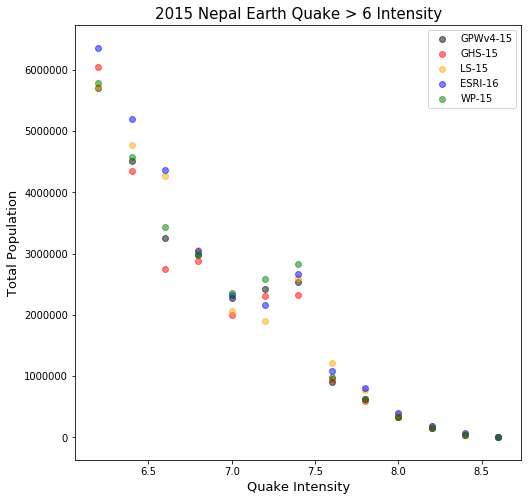

In [8]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = '2015 Nepal Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHS-15', 'LS-15', 'ESRI-16', 'WP-15']
plt.legend(labels)


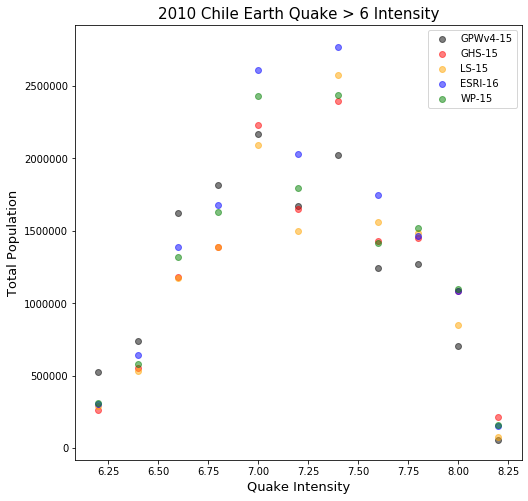

In [9]:
#### plot it
data = chile_polys_sum[chile_polys_sum['PARAMVALUE'] > 6]
title = '2010 Chile Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHS-15', 'LS-15', 'ESRI-16', 'WP-15']
plt.legend(labels)

# Urban

In [10]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*_urban.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/GHS15_matched_urban.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_matched_urban.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_matched_urban.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_matched_urban.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_matched_urban.tif']

In [11]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'
chile_polys_fn = DATA_PATH+'raw/USGS_Data/Chile/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)
chile_polys = poly_prep(chile_polys_fn, col)

In [20]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_matched_urban.tif')
chile_polys_sum = zone_loop(chile_polys, rst_fns, 'sum', col, '_matched_urban.tif')


Started GHS15
Started GPWv4
Started ESRI16
Started WP16
Started LS15
Started GHS15
Started GPWv4
Started ESRI16
Started WP16
Started LS15


In [22]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_urban_quake_pop.shp')
chile_polys_sum.to_file(DATA_PATH+'/interim/chile_urban_quake_pop.shp')

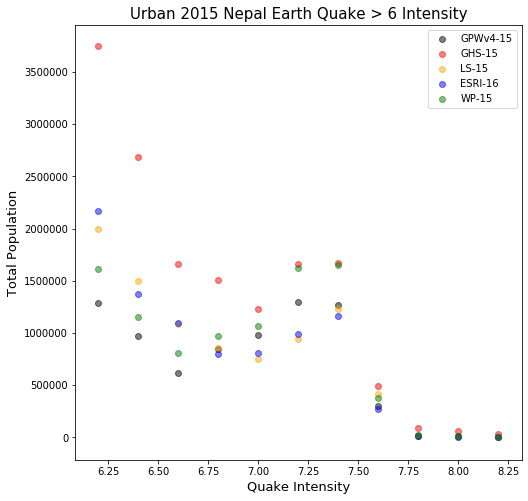

In [24]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = 'Urban 2015 Nepal Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHS-15', 'LS-15', 'ESRI-16', 'WP-15']
plt.legend(labels)


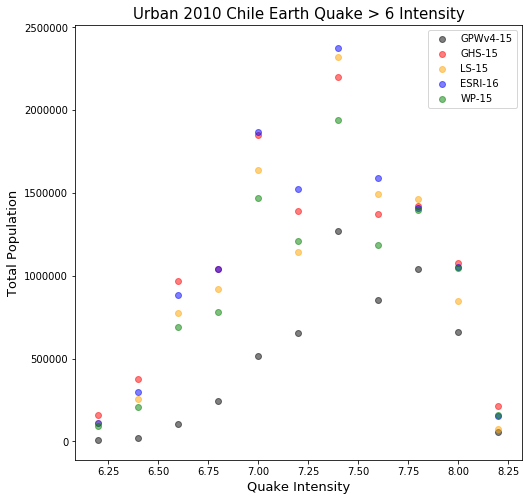

In [25]:
#### plot it
data = chile_polys_sum[chile_polys_sum['PARAMVALUE'] > 6]
title = 'Urban 2010 Chile Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHS-15', 'LS-15', 'ESRI-16', 'WP-15']
plt.legend(labels)

# Rural

In [26]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*_rural.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/LS15_matched_rural.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_matched_rural.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_matched_rural.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_matched_rural.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_matched_rural.tif']

In [27]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'
chile_polys_fn = DATA_PATH+'raw/USGS_Data/Chile/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)
chile_polys = poly_prep(chile_polys_fn, col)

In [28]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_matched_rural.tif')
chile_polys_sum = zone_loop(chile_polys, rst_fns, 'sum', col, '_matched_rural.tif')


Started LS15
Started WP16
Started GPWv4
Started ESRI16
Started GHS15
Started LS15
Started WP16
Started GPWv4
Started ESRI16
Started GHS15


In [29]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_rural_quake_pop.shp')
chile_polys_sum.to_file(DATA_PATH+'/interim/chile_rural_quake_pop.shp')

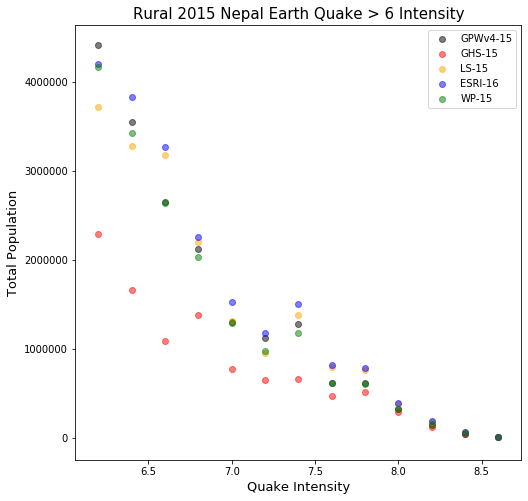

In [30]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = 'Rural 2015 Nepal Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHS-15', 'LS-15', 'ESRI-16', 'WP-15']
plt.legend(labels)


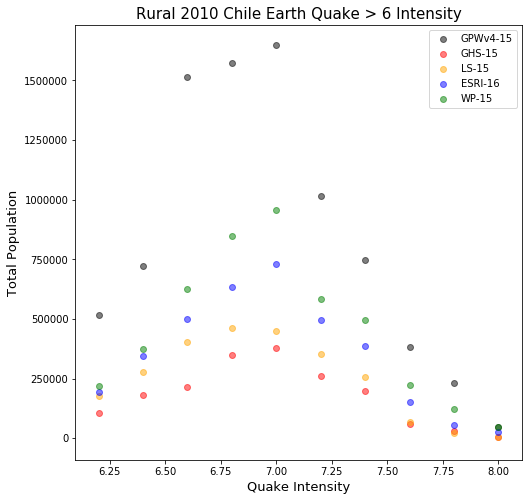

In [31]:
#### plot it
data = chile_polys_sum[chile_polys_sum['PARAMVALUE'] > 6]
title = 'Rural 2010 Chile Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHS-15', 'LS-15', 'ESRI-16', 'WP-15']
plt.legend(labels)